In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import utils
import pickle
from keras.utils.vis_utils import plot_model
np.random.seed(42)

In [18]:
# Setting Custom function for saving figures and getting data
import importlib
importlib.reload(utils)

<module 'utils' from '/home/abhishek/Desktop/sign-language-classifier/utils.py'>

In [19]:
# cnn3_wo_aug is without augmentaion else any model name is assumed feed as augmented
model_name = "cnn_aug"

In [20]:
X_train, y_train, X_test, y_test = utils.load_dataset()

In [21]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [22]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.3, random_state = 101)

In [23]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_dev = X_dev.reshape(-1,28,28,1)

In [24]:
# Augementing the images
datagenerator = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

datagenerator.fit(X_train)

In [25]:
if model_name == "cnn2_wo_aug":
    datagenerator = ImageDataGenerator()
    datagenerator.fit(X_train)

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

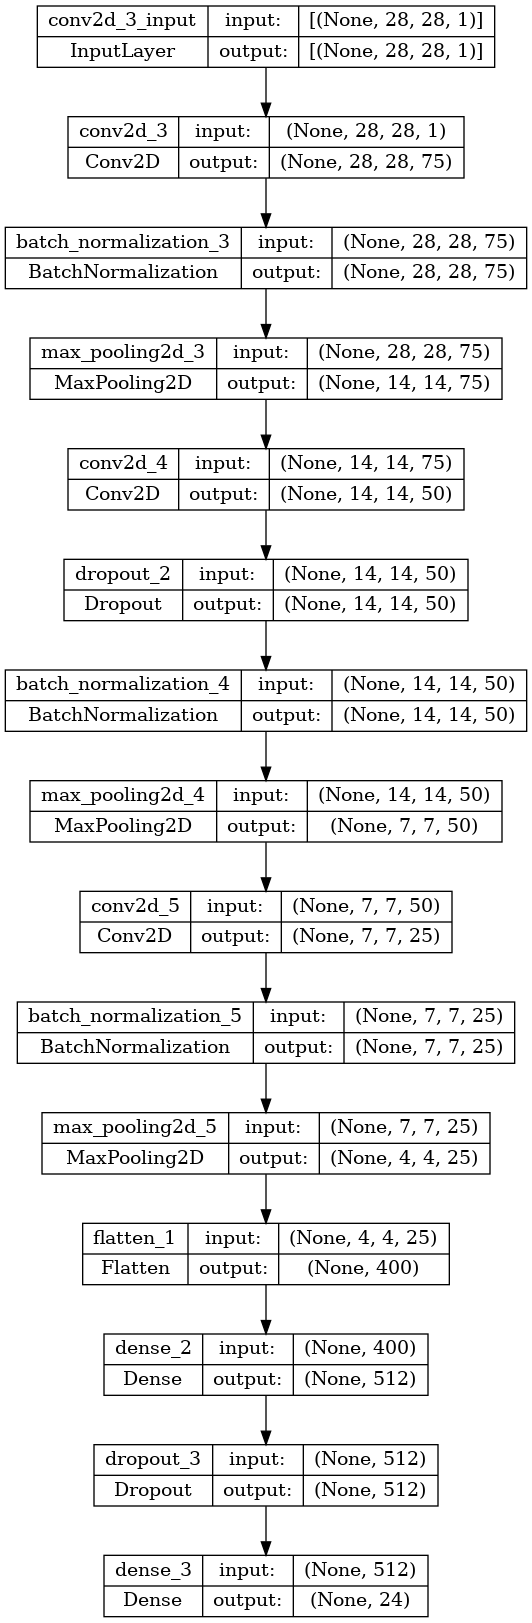

In [27]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()
plot_model(model, to_file='./results/'+model_name+'_model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
history = model.fit(datagenerator.flow(X_train,y_train, batch_size = 128) ,epochs = 15 , validation_data = (X_dev, y_dev) , callbacks = [learning_rate_reduction])

Epoch 1/15
151/151 [==============================] - 3s 19ms/step - loss: 1.2904 - accuracy: 0.5969 - val_loss: 4.1400 - val_accuracy: 0.0516 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - 3s 19ms/step - loss: 0.3194 - accuracy: 0.8968 - val_loss: 2.8811 - val_accuracy: 0.1476 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - 3s 19ms/step - loss: 0.1521 - accuracy: 0.9507 - val_loss: 0.6007 - val_accuracy: 0.8243 - lr: 0.0010
Epoch 4/15
151/151 [==============================] - 3s 20ms/step - loss: 0.0985 - accuracy: 0.9680 - val_loss: 0.0468 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 5/15
151/151 [==============================] - 3s 19ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.0865 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 6/15
148/151 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9836
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
151/151 [==============================] - 3s 19

In [29]:
y_pred = model.predict(X_test)

225/225 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       1.00      1.00      1.00       394
          12       1.00      1.00      1.00       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       1.00      1.00      1.00       144
          17       1.00    

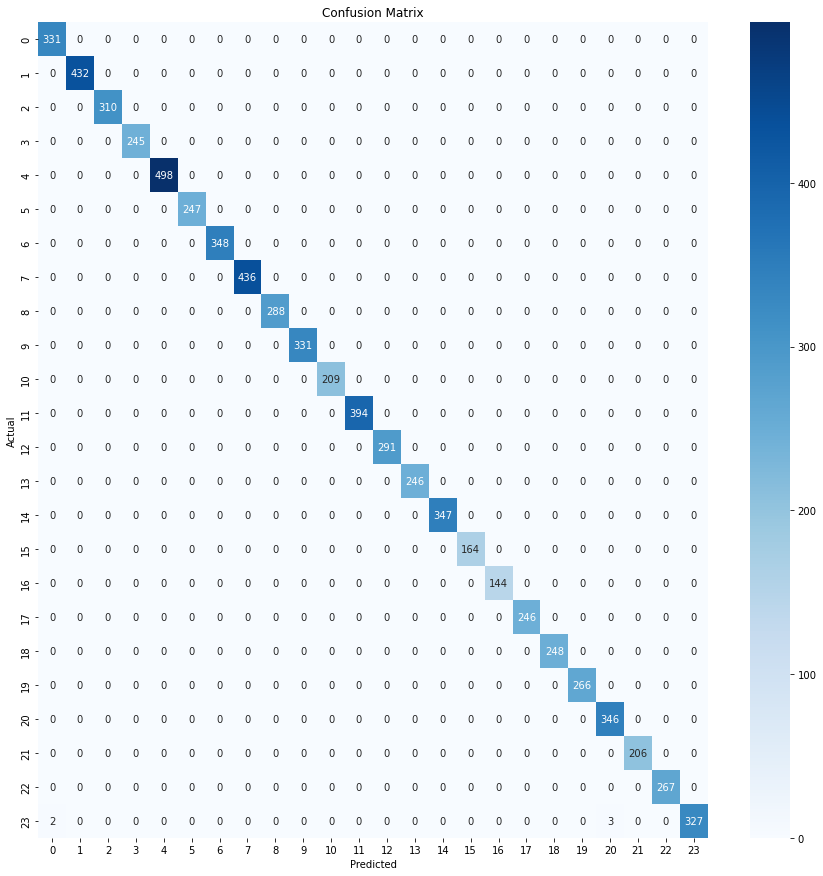

In [30]:
utils.save_results(np.argmax(y_test,axis=1),np.argmax(y_pred.round(),axis=1), model_name)

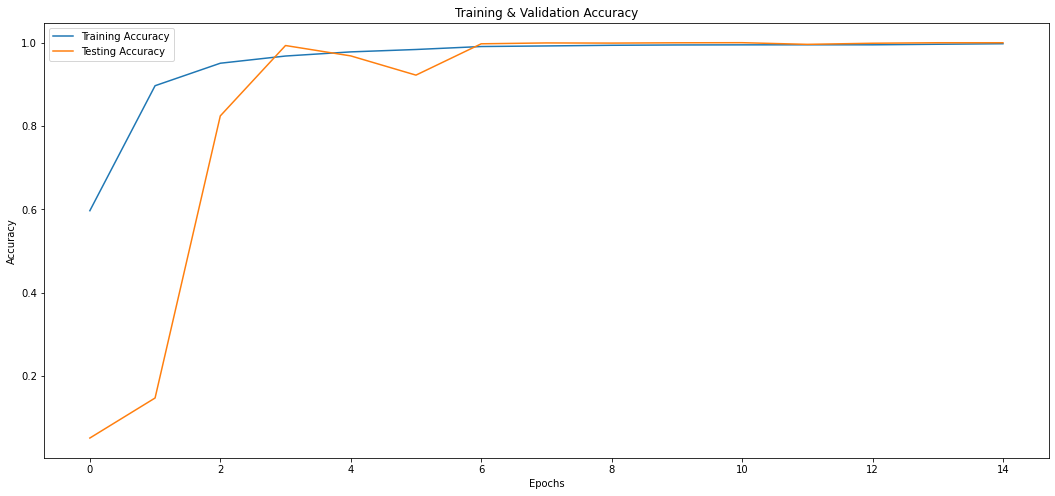

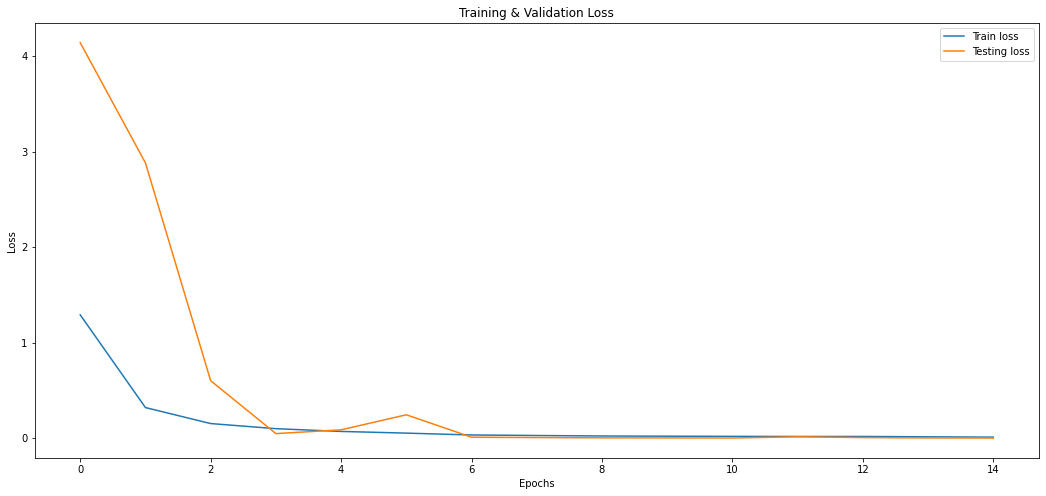

In [31]:
utils.save_model_history(history, model_name)

In [32]:
pickle.dump(model,open("./models/"+model_name+".hd5","wb"))

INFO:tensorflow:Assets written to: ram://222d9dca-b869-4f26-b81e-2367cc2253f3/assets


INFO:tensorflow:Assets written to: ram://222d9dca-b869-4f26-b81e-2367cc2253f3/assets
